In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

Basic description of data

In [3]:
df.head().sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
4,male,group C,some college,standard,none,76,78,75
3,male,group A,associate's degree,free/reduced,none,47,57,44
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
1,female,group C,some college,standard,completed,69,90,88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Creating variable 'Language Performance' and 'Overall Performance'

In [6]:
df['Language Performance'] = (df['reading score'] + df['writing score'])/2

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Language Performance
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,89.0
2,female,group B,master's degree,standard,none,90,95,93,94.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5
4,male,group C,some college,standard,none,76,78,75,76.5


In [8]:
df['Overall Performance'] = round((df['math score'] + df['reading score'] + df['writing score'])/3,2)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Language Performance,Overall Performance
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33
4,male,group C,some college,standard,none,76,78,75,76.5,76.33


In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Language Performance', 'Overall Performance'],
      dtype='object')

## Hypothesis 1: There is no difference in means of student performance in any of basic literacy skills i.e. reading, writing, math.

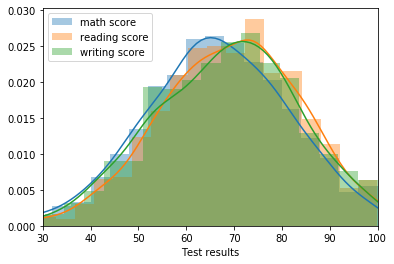

In [11]:
sb.distplot(df['math score'], label = 'math score')
sb.distplot(df['reading score'], label = 'reading score')
sb.distplot(df['writing score'], label = 'writing score')
plt.xlim(30,100)
plt.xlabel('Test results')
plt.legend();

Ho: There is no difference in performance of students between math, reading and writing skills.

Ha: There is a difference in performance of students between math, reaing and writing skills.

##### Types of Error:

A Type 1 Error is rejecting the null hypothesis when Ho is actually true. A Type 2 Error is failing to reject the null hypothesis when the alternative is actually true.

Consequences of Type 1 and Type 2 errors:

Type 1 error: In this case we may wrongly believe that there is a difference in performance of students between math, reading and writing skills. We may dedicate our time and other resources to understand whether students are performing worse in any particular subject and bridge the gap between them unnecessarily.

Type 2 error: In this case we may wrongly believe that there is no difference in performance of students between math, reading and writing skills. Assuming no difference in performance no necessary steps will be taken to understand whether students are facing any difficulties in any particular subject or not. In this case Type 2 error is more costly/dangerous than Type 1 error.

##### Significance Level:

The signiﬁcance level selected for a test should reﬂect the consequences associated with Type 1 and Type 2 Errors.

Since Type 2 error is more dangerous, we would increase the significance level to 0.10 from the standard 0.05 because we want to be cautious about failing to reject Ho when our null hypothesis is actually false.


### Technique used : One way ANOVA

<img src="medium_1.png"/>

In [12]:
# Finding global mean
m_math = np.mean(df['math score'])
m_reading = np.mean(df['reading score'])
m_writing = np.mean(df['writing score'])
m_total = (m_math + m_reading + m_writing)/3

# Variance between groups
SSB = 1000*((m_math - m_total)**2 + (m_reading - m_total)**2 + (m_writing - m_total)**2)

# Variance within each sample
SS_math = np.sum((df['math score'] - m_math)**2)
SS_reading = np.sum((df['reading score'] - m_reading)**2)
SS_writing = np.sum((df['writing score'] - m_writing)**2)
SSW = SS_math + SS_reading + SS_writing

# Mean square value between groups
df_between = 2 ## 3columns - 1
MSB = SSB/df_between

# Mean square value within groups
df_within = (1000*3 -3) ### N - C
MSW = SSW/df_within

# F-score
F_score = MSB/MSW
print('Calculated F_score is ', F_score)

Calculated F_score is  10.82419162837862


#### Verifying F score and finding f critical value

In [13]:
# Validating F score
import scipy.stats as stats
print(stats.f_oneway(df['math score'], df['reading score'], df['writing score']))

# Finding F critical
from scipy.stats import f
print('F critical value for 0.1 significant value is ', f.ppf(0.9, df_between, df_within))

F_onewayResult(statistic=10.824191628378626, pvalue=2.0701893192229333e-05)
F critical value for 0.1 significant value is  2.304355067891861


F critical = 2.304

F_score = 10.82

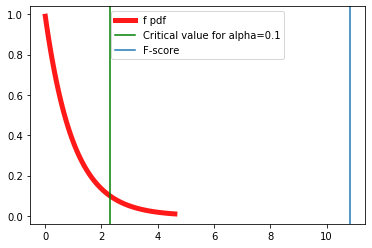

In [14]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,2997
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.9, label='f pdf')
plt.axvline(x=f.ppf(0.9, dfn, dfd), label='Critical value for alpha=0.1', color='g')
plt.axvline(x=10.82, label='F-score')
plt.legend();

In [15]:
df_within

2997

#### Conclusion:


Since the value obtained by us beyond the critical region. Our Null Hypothesis that there exist no significant difference in the mean of the three writing scores/the scores come from the same population has to be rejected.

## Hypothesis 2: There is no relation between the gender of a student and their corresponding academic performance.

Ho: There is no relation between the gender of a student and their corresponding academic performance.

Ha: There is a relation between the gender of a student and their corresponding academic performance.

##### Types of Error:

A Type 1 Error is rejecting the null hypothesis when Ho is actually true. A Type 2 Error is failing to reject the null hypothesis when the alternative is actually true.

Consequences of Type 1 and Type 2 errors:

Type 1 error: In this case we may wrongly believe that here is a relation between the gender of a student and their corresponding academic performance. We may dedicate our time and other resources to find reasonable measures to mitigate the problem when none was required in the first place.

Type 2 error: In this case we may wrongly believe that there is no relation between the gender of a student and their corresponding academic performance. Assuming no difference in performance no necessary steps will be taken and hence this case of Type 2 error is more costly/dangerous than Type 1 error.

##### Significance Level:

The signiﬁcance level selected for a test should reﬂect the consequences associated with Type 1 and Type 2 Errors.

Since Type 2 error is more dangerous, we would increase the significance level to 0.10 from the standard 0.05 because we want to be cautious about failing to reject Ho when our null hypothesis is actually false.


### Technique used : Chi-Square Test of Independence

Note: Here we will be creating a feature called Verdict which will let us know whether a student's performance is acceptable or not. We have 40 as the threshold for overall performance to be considered acceptable.

In [16]:
def perf_eval(num):
    if num <40:
        return 'Not Acceptable'
    else:
        return 'Acceptable'

In [17]:
df['Verdict'] = df['Overall Performance'].apply(perf_eval)

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Language Performance,Overall Performance,Verdict
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67,Acceptable
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33,Acceptable
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67,Acceptable
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33,Acceptable
4,male,group C,some college,standard,none,76,78,75,76.5,76.33,Acceptable


In [19]:
Contingency_Table = pd.crosstab(df['gender'],df['Verdict'], margins = True)
Contingency_Table

Verdict,Acceptable,Not Acceptable,All
gender,,,
female,502,16,518
male,468,14,482
All,970,30,1000


<img src="medium_2.png">

In [20]:
Observed_values = np.append(Contingency_Table.iloc[0][0:2].values,
                        Contingency_Table.iloc[1][0:2].values)
Observed_values

array([502,  16, 468,  14], dtype=int64)

In [21]:
Overall_total = Contingency_Table.loc['All','All']

In [22]:
row_total = Contingency_Table.iloc[0:2,2].values
column_total = Contingency_Table.iloc[2,0:2].values

In [23]:
Expected_values = []
for i in range(2):
    for j in range(2):
        Expected_values.append(row_total[i]*column_total[j]/Overall_total)
Expected_values

[502.46, 15.54, 467.54, 14.46]

DOF = (No. of rows - 1)(No. of columns - 1) = (2-1)(2-1) = 1

In [24]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
dof = 1
Chi_square_value = np.sum((Observed_values-Expected_values)**2/Expected_values)
print('Chi_square score is ', Chi_square_value)
print('Chi_square critical is ', chi2.ppf(0.9,dof))

Chi_square score is  0.029123654909683938
Chi_square critical is  2.705543454095404


Chi_square critical: 2.705

Chi_square score: 0.029

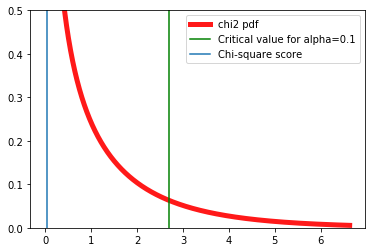

In [25]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dof = 1
x = np.linspace(chi2.ppf(0.01, dof), chi2.ppf(0.99, dof), 1000)
#x = np.linspace(norm.ppf(0.01, dof), norm.ppf(0.99, dof), 1000)
#x = np.linspace(0, 1, 1000)
#x = np.linspace(0,10,100)
ax.plot(x, chi2.pdf(x, dof),
       'r-', lw=5, alpha=0.9, label = 'chi2 pdf')
plt.axvline(x=chi2.ppf(0.9,dof), label='Critical value for alpha=0.1', color='g')
plt.axvline(0.029123654909683938, label='Chi-square score')
plt.legend()
plt.ylim(0,0.5)
plt.plot();
#print(x)

#### Conclusion:

From Chi-square table for DOF = 1 and p value = 0.05 Chi-square critical = 2.70
Since our calculated Chi-square value is less than the critical value we cannot reject our null hypothesis that there is no relationship between gender and a student's overall performance.

## Hypothesis 3: There is no difference between students mean performance in either language skill or basic math skill.

Ho: There is no difference in performance of students between language and basic math skill.

Ha: There is a difference in performance of students between language and basic math skill.

##### Types of Error:

A Type 1 Error is rejecting the null hypothesis when Ho is actually true. A Type 2 Error is failing to reject the null hypothesis when the alternative is actually true.

Consequences of Type 1 and Type 2 errors:

Type 1 error: In this case we may wrongly believe that there is a difference in performance between language and basic math skill. We may dedicate our time and other resources to bridge the gap between them unnecessarily.

Type 2 error: In this case we may wrongly believe that there is no difference in performance between language and basic math skill. Assuming no difference in performance no necessary steps will be taken to decrease the gap in performance in both subjects. E.g. conducting extra classes, assignments especially for the subject in which students are underperforming in general. In this case Type 2 error is more costly/dangerous than Type 1 error.

##### Significance Level:

The signiﬁcance level selected for a test should reﬂect the consequences associated with Type 1 and Type 2 Errors.

Since Type 2 error is more dangerous, we would increase the significance level to 0.10 from the standard 0.05 because we want to be cautious about failing to reject Ho when our null hypothesis is actually false.


### Technique used: Two sample t-test (Independent t-test)

##### Levene's Test

One of the assumptions for two-sample t-test is that the sample observations have homogeneity of variance. [The variances of the populations from which different samples are drawn are equal.]

Student's t-test is no longer robust when the data sets have unequal variances especially when they also have unequal sample sizes.

Null Hypothesis for Levene's test: The two samples come from a population having equal variance.

Alternate Hypothesis for Levene's test: The two samples come from a population having different variance.

In [26]:
import scipy.stats as st
st.levene(df['math score'], df['Language Performance'], center = 'mean') 

LeveneResult(statistic=0.2226559155894565, pvalue=0.6370751786068942)

Here the p-value is greater than 0.05 and hence we fail to reject the null hypothesis. Therefore there is no significant evidence that there is any variance in the population from which the two samples are taken.

#### Conducting two sample t-test

In [27]:
st.ttest_ind(df['math score'], df['Language Performance'], equal_var = True)

Ttest_indResult(statistic=-3.7736329858162225, pvalue=0.00016557604162518357)

#### Conclusion:

Because the p value is smaller than 0.1, it provides sufficiently strong evidence to reject the null hypothesis in favor of the alternative.

## Hypothesis 4: There is no significant difference in the mean score of students who have taken test preparation and those students who have not taken any test preparation

Ho: There is no difference in overall performance of students between those who have taken test preparation and those who have not.

Ha: There is a difference in overall performance of students between those who have taken test preparation and those who have not.

##### Types of Error:

A Type 1 Error is rejecting the null hypothesis when Ho is actually true. A Type 2 Error is failing to reject the null hypothesis when the alternative is actually true.

Consequences of Type 1 and Type 2 errors:

Type 1 error: In this case we may wrongly believe that there is a difference in performance between those who have taken test preparation and those who have not. We may dedicate our time and other resources to enroll more students for test preparation, prepare questionaire and solutions which may waste resources of teaching staff unnecessarily.

Type 2 error: In this case we may wrongly believe that there is no difference in performance between those who have taken test preparation and those who have not. Assuming no difference in performance no necessary steps will be taken to increase the enrollment of students in test preparation. In this case Type 2 error is more costly/dangerous than Type 1 error.

##### Significance Level:

The signiﬁcance level selected for a test should reﬂect the consequences associated with Type 1 and Type 2 Errors.

Since Type 2 error is more dangerous, we would increase the significance level to 0.10 from the standard 0.05 because we want to be cautious about failing to reject Ho when our null hypothesis is actually false.


### Technique used: Two sample t-test (Independent t-test)

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Language Performance,Overall Performance,Verdict
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,72.67,Acceptable
1,female,group C,some college,standard,completed,69,90,88,89.0,82.33,Acceptable
2,female,group B,master's degree,standard,none,90,95,93,94.0,92.67,Acceptable
3,male,group A,associate's degree,free/reduced,none,47,57,44,50.5,49.33,Acceptable
4,male,group C,some college,standard,none,76,78,75,76.5,76.33,Acceptable


In [55]:
df['math score'][df['test preparation course'] == 'completed'].shape

(358,)

In [56]:
df['math score'][df['test preparation course'] == 'none'].shape

(642,)

##### Levene's Test

One of the assumptions for two-sample t-test is that the sample observations have homogeneity of variance. [The variances of the populations from which different samples are drawn are equal.]

Student's t-test is no longer robust when the data sets have unequal variances especially when they also have unequal sample sizes.

Null Hypothesis for Levene's test: The two samples come from a population having equal variance.

Alternate Hypothesis for Levene's test: The two samples come from a population having different variance.

In [31]:
st.levene(df['math score'][df['test preparation course'] == 'completed'], df['math score']
          [df['test preparation course'] == 'none'],
          center = 'mean') 

LeveneResult(statistic=0.5084381576730838, pvalue=0.4759824372242518)

Here the p-value is greater than 0.05 and hence we fail to reject the null hypothesis. Therefore there is no significant evidence that there is any variance in the population from which the two samples are taken.

In [32]:
df['math score'][df['test preparation course'] == 'completed'].describe()

count    358.000000
mean      69.695531
std       14.444699
min       23.000000
25%       60.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math score, dtype: float64

In [33]:
df['math score'][df['test preparation course'] == 'none'].describe()

count    642.000000
mean      64.077882
std       15.192376
min        0.000000
25%       54.000000
50%       64.000000
75%       74.750000
max      100.000000
Name: math score, dtype: float64

#### Conducting two sample t-test

In [34]:
st.ttest_ind(df['math score'][df['test preparation course'] == 'completed'], 
             df['math score'][df['test preparation course'] == 'none'])

Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)

#### Bottom 2 cells added later

In [35]:
t_2sample_statistic = st.ttest_ind(df['math score'][df['test preparation course'] == 'completed'], 
                                     df['math score'][df['test preparation course'] == 'none'])[0]
t_2sample_statistic

5.704616417349102

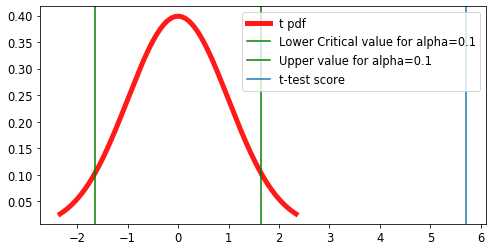

In [57]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 4))
dof = 357 # smaller (n-1)
x = np.linspace(t.ppf(0.01, dof), t.ppf(0.99, dof), 1000)
ax.plot(x, t.pdf(x, dof),
       'r-', lw=5, alpha=0.9, label = 't pdf')
plt.axvline(x=t.ppf(0.05,dof), label='Lower Critical value for alpha=0.1', color='g')
plt.axvline(x=t.ppf(0.95,dof), label='Upper value for alpha=0.1', color='g')
plt.axvline(t_2sample_statistic, label='t-test score')
plt.legend()
plt.plot();

X axis should be mu(with prepration) - mu(without preparation) = 0 (Page 235 open intro)

#### Conclusion:

Because the p value is smaller than 0.1, it provides sufficiently strong evidence to reject the null hypothesis in favor of the alternative.

## Understanding and simulating Central Limit Theorem

The central limit theorem states that the sampling distribution of the mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough.

To understand this concept we will be actually simulating it through experiments. We will create a sampling distribution of sample means where each sample is of size n (will take different values) and observe how closely it approximates an ideal normal distribution.

We will use two distributions as populations, one obtained from the dataset itself which is slightly skewed and an exponential distribution which is highly skewed. This will enable us to understand whether this theorem also applies to samples which come from distributions other than normal.

#### Considering 'math score' from the dataset as the population

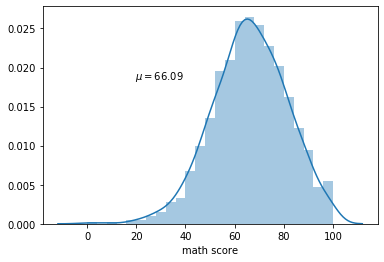

In [36]:
sb.distplot(df['math score']);

population_mean = round(df['math score'].mean(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(1/6), top_ylimit*(2/3), r'$\mu= %s$' % population_mean);


We observe that the math score of the students is nearly normal with slight skew to the left. Here the mean is 66.09 and will be considered as the population mean.

#### Considering an exponential distribution as the population

In [37]:
pdf_df = pd.DataFrame({'success': range(0, 5000, 10),
                      'pdf': list(stats.expon.pdf(range(0, 5000, 10),
                                                 loc = 1/100,
                                                 scale = 1000))})

(0, 0.0012)

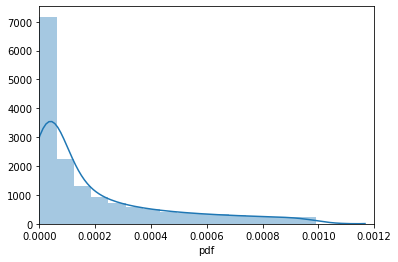

In [38]:
sb.distplot(pdf_df.pdf)
plt.xlim(0, 0.0012)

In [39]:
pdf_df.shape

(500, 2)

## One chart explaining all of CLT 

In [40]:
font = {'size'   : 11.5}

matplotlib.rc('font', **font)

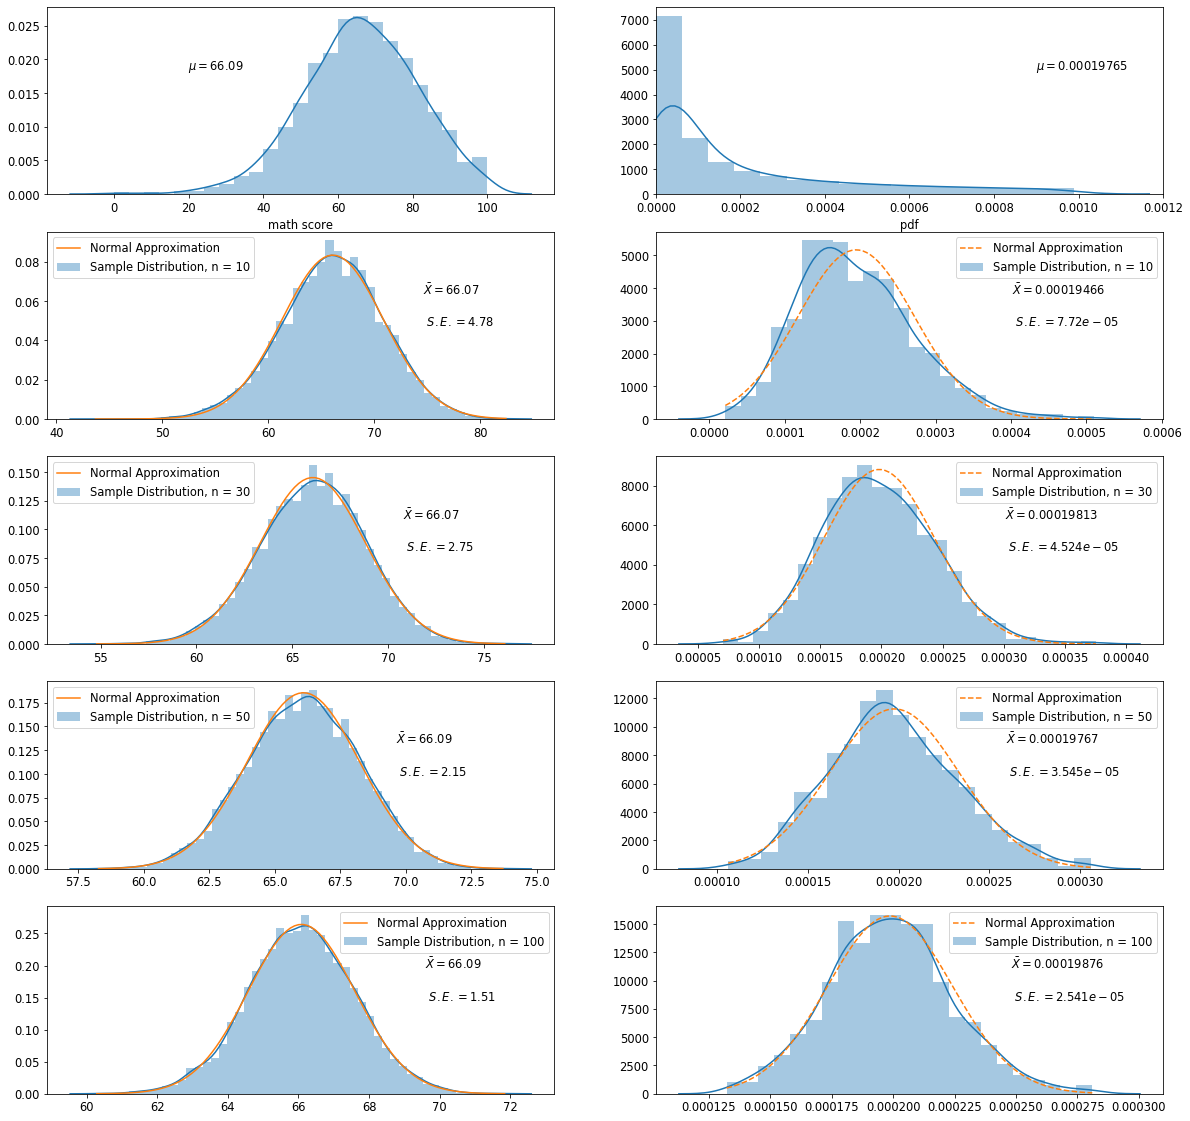

In [41]:

plt.figure(figsize=(20, 20))

plt.subplot(521)
sb.distplot(df['math score']);

population_mean = round(df['math score'].mean(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(1/6), top_ylimit*(2/3), r'$\mu= %s$' % population_mean)


plt.subplot(523)
List_1 = []              # Using for loop to create 10000 samples of size 10 from the original population 'math score'
for i in range(0,10000):
    n_samples = np.random.choice(df['math score'],10)
    List_1.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_1, label = 'Sample Distribution, n = 10');

x = np.linspace(np.array(List_1).min(), np.array(List_1).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_1).mean(), scale = np.array(List_1).std())
plt.plot(x,y, label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_1).mean(),2)
standard_error = round(np.array(List_1).std(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(6/7), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(6/7), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(525)
List_2 = []              # Using for loop to create 10000 samples of size 30 from the original population 'math score'
for i in range(0,10000):
    n_samples = np.random.choice(df['math score'],30)
    List_2.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_2, label = 'Sample Distribution, n = 30');

x = np.linspace(np.array(List_2).min(), np.array(List_2).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_2).mean(), scale = np.array(List_2).std())
plt.plot(x,y, label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_2).mean(),2)
standard_error = round(np.array(List_2).std(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.9), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.9), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(527)
List_3 = []              # Using for loop to create 10000 samples of size 50 from the original population 'math score'
for i in range(0,10000):
    n_samples = np.random.choice(df['math score'],50)
    List_3.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_3, label = 'Sample Distribution, n = 50');

x = np.linspace(np.array(List_3).min(), np.array(List_3).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_3).mean(), scale = np.array(List_3).std())
plt.plot(x,y, label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_3).mean(),2)
standard_error = round(np.array(List_3).std(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.92), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.92), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)


plt.subplot(529)
List_4 = []              # Using for loop to create 10000 samples of size 100 from the original population 'math score'
for i in range(0,10000):
    n_samples = np.random.choice(df['math score'],100)
    List_4.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_4, label = 'Sample Distribution, n = 100');

x = np.linspace(np.array(List_4).min(), np.array(List_4).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_4).mean(), scale = np.array(List_4).std())
plt.plot(x,y, label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_4).mean(),2)
standard_error = round(np.array(List_4).std(),2)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.95), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.95), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(522)
sb.distplot(pdf_df.pdf)
plt.xlim(0, 0.0012)

population_mean = round(pdf_df.pdf.mean(),8)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(3/4), top_ylimit*(2/3), r'$\mu= %s$' % population_mean)


plt.subplot(524)
List_5 = []              # Using for loop to create 10000 samples of size 10 from a population which has exponential distribution
for i in range(0,1000):
    n_samples = np.random.choice(pdf_df.pdf,10)
    List_5.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_5, label = 'Sample Distribution, n = 10')

x = np.linspace(np.array(List_5).min(), np.array(List_5).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_5).mean(), scale = np.array(List_5).std())
plt.plot(x,y, '--', label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_5).mean(),8)
standard_error = round(np.array(List_5).std(),8)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(2/3), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(2/3), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(526)
List_5 = []              # Using for loop to create 10000 samples of size 30 from a population which has exponential distribution
for i in range(0,1000):
    n_samples = np.random.choice(pdf_df.pdf,30)
    List_5.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_5,  label = 'Sample Distribution, n = 30')

x = np.linspace(np.array(List_5).min(), np.array(List_5).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_5).mean(), scale = np.array(List_5).std())
plt.plot(x,y, '--', label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_5).mean(),8)
standard_error = round(np.array(List_5).std(),8)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.7), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.7), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(528)
List_5 = []              # Using for loop to create 10000 samples of size 50 from a population which has exponential distribution
for i in range(0,1000):
    n_samples = np.random.choice(pdf_df.pdf,50)
    List_5.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_5, label = 'Sample Distribution, n = 50')

x = np.linspace(np.array(List_5).min(), np.array(List_5).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_5).mean(), scale = np.array(List_5).std())
plt.plot(x,y, '--', label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_5).mean(),8)
standard_error = round(np.array(List_5).std(),8)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.75), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.75), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.subplot(5,2,10)
List_5 = []              # Using for loop to create 10000 samples of size 100 from a population which has exponential distribution
for i in range(0,1000):
    n_samples = np.random.choice(pdf_df.pdf,100)
    List_5.append(n_samples.mean())# a mean is calculated for each sample for further plotting
sb.distplot(List_5, label = 'Sample Distribution, n = 100')

x = np.linspace(np.array(List_5).min(), np.array(List_5).max(), 100)
y = stats.norm.pdf(x, loc = np.array(List_5).mean(), scale = np.array(List_5).std())
plt.plot(x,y, '--', label = 'Normal Approximation')
plt.legend()

sample_mean = round(np.array(List_5).mean(),8)
standard_error = round(np.array(List_5).std(),8)
right_xlimit = plt.xlim()[1]
top_ylimit = plt.ylim()[1]
plt.text(right_xlimit*(0.8), top_ylimit*(2/3), r'$\bar{X}= %s$' % sample_mean)
plt.text(right_xlimit*(0.8), top_ylimit*(2/4), r'$\ S.E.= %s$' % standard_error)

plt.show()

#### Observations:

1. We can observe that irrespective whether a sample comes from a distribution belonging to normal or not, the sample distribution of the sample means tends to be normal thus proving the central limit theorem.
2. We observe that as sample size increases the standard error of the sampling distribution goes on decreasing.
3. In general as sample size increases the normal approximation improves.
4. However if sample belongs from a population which is highly skewed then it requires a much larger size to approximate the normal distribution. So if a dataset has prominent outliers, or such observations are somewhat common for the type of data under study, then it is useful to collect a sample with many more than 30 observations (which is normally used) if the normal model is applied.
 